In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
M=nx.read_gml("C:/MS/Data Science Essentials/polblogs.gml")

In [9]:
len(M)

1490

In [10]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

# Do the same but only for "liberal/left" as identified by value==0
notL = list(n for n,d in M.nodes_iter(data=True) if (d["value"]!=0))
ML = M.copy()
ML.remove_nodes_from(notL)
L = nx.Graph()
for u,v,data in ML.edges_iter(data=True):
    if L.has_edge(u,v):
        L[u][v]['weight'] += 1
    else:
        L.add_edge(u, v, weight=1)

# Do the same but only for "conservative/right" as identified by value==1
notR = list(n for n,d in M.nodes_iter(data=True) if (d["value"]!=1))
MR = M.copy()
MR.remove_nodes_from(notR)
R = nx.Graph()
for u,v,data in MR.edges_iter(data=True):
    if R.has_edge(u,v):
        R[u][v]['weight'] += 1
    else:
        R.add_edge(u, v, weight=1)

## Question 1.  Create a nice looking graph of the political blog network

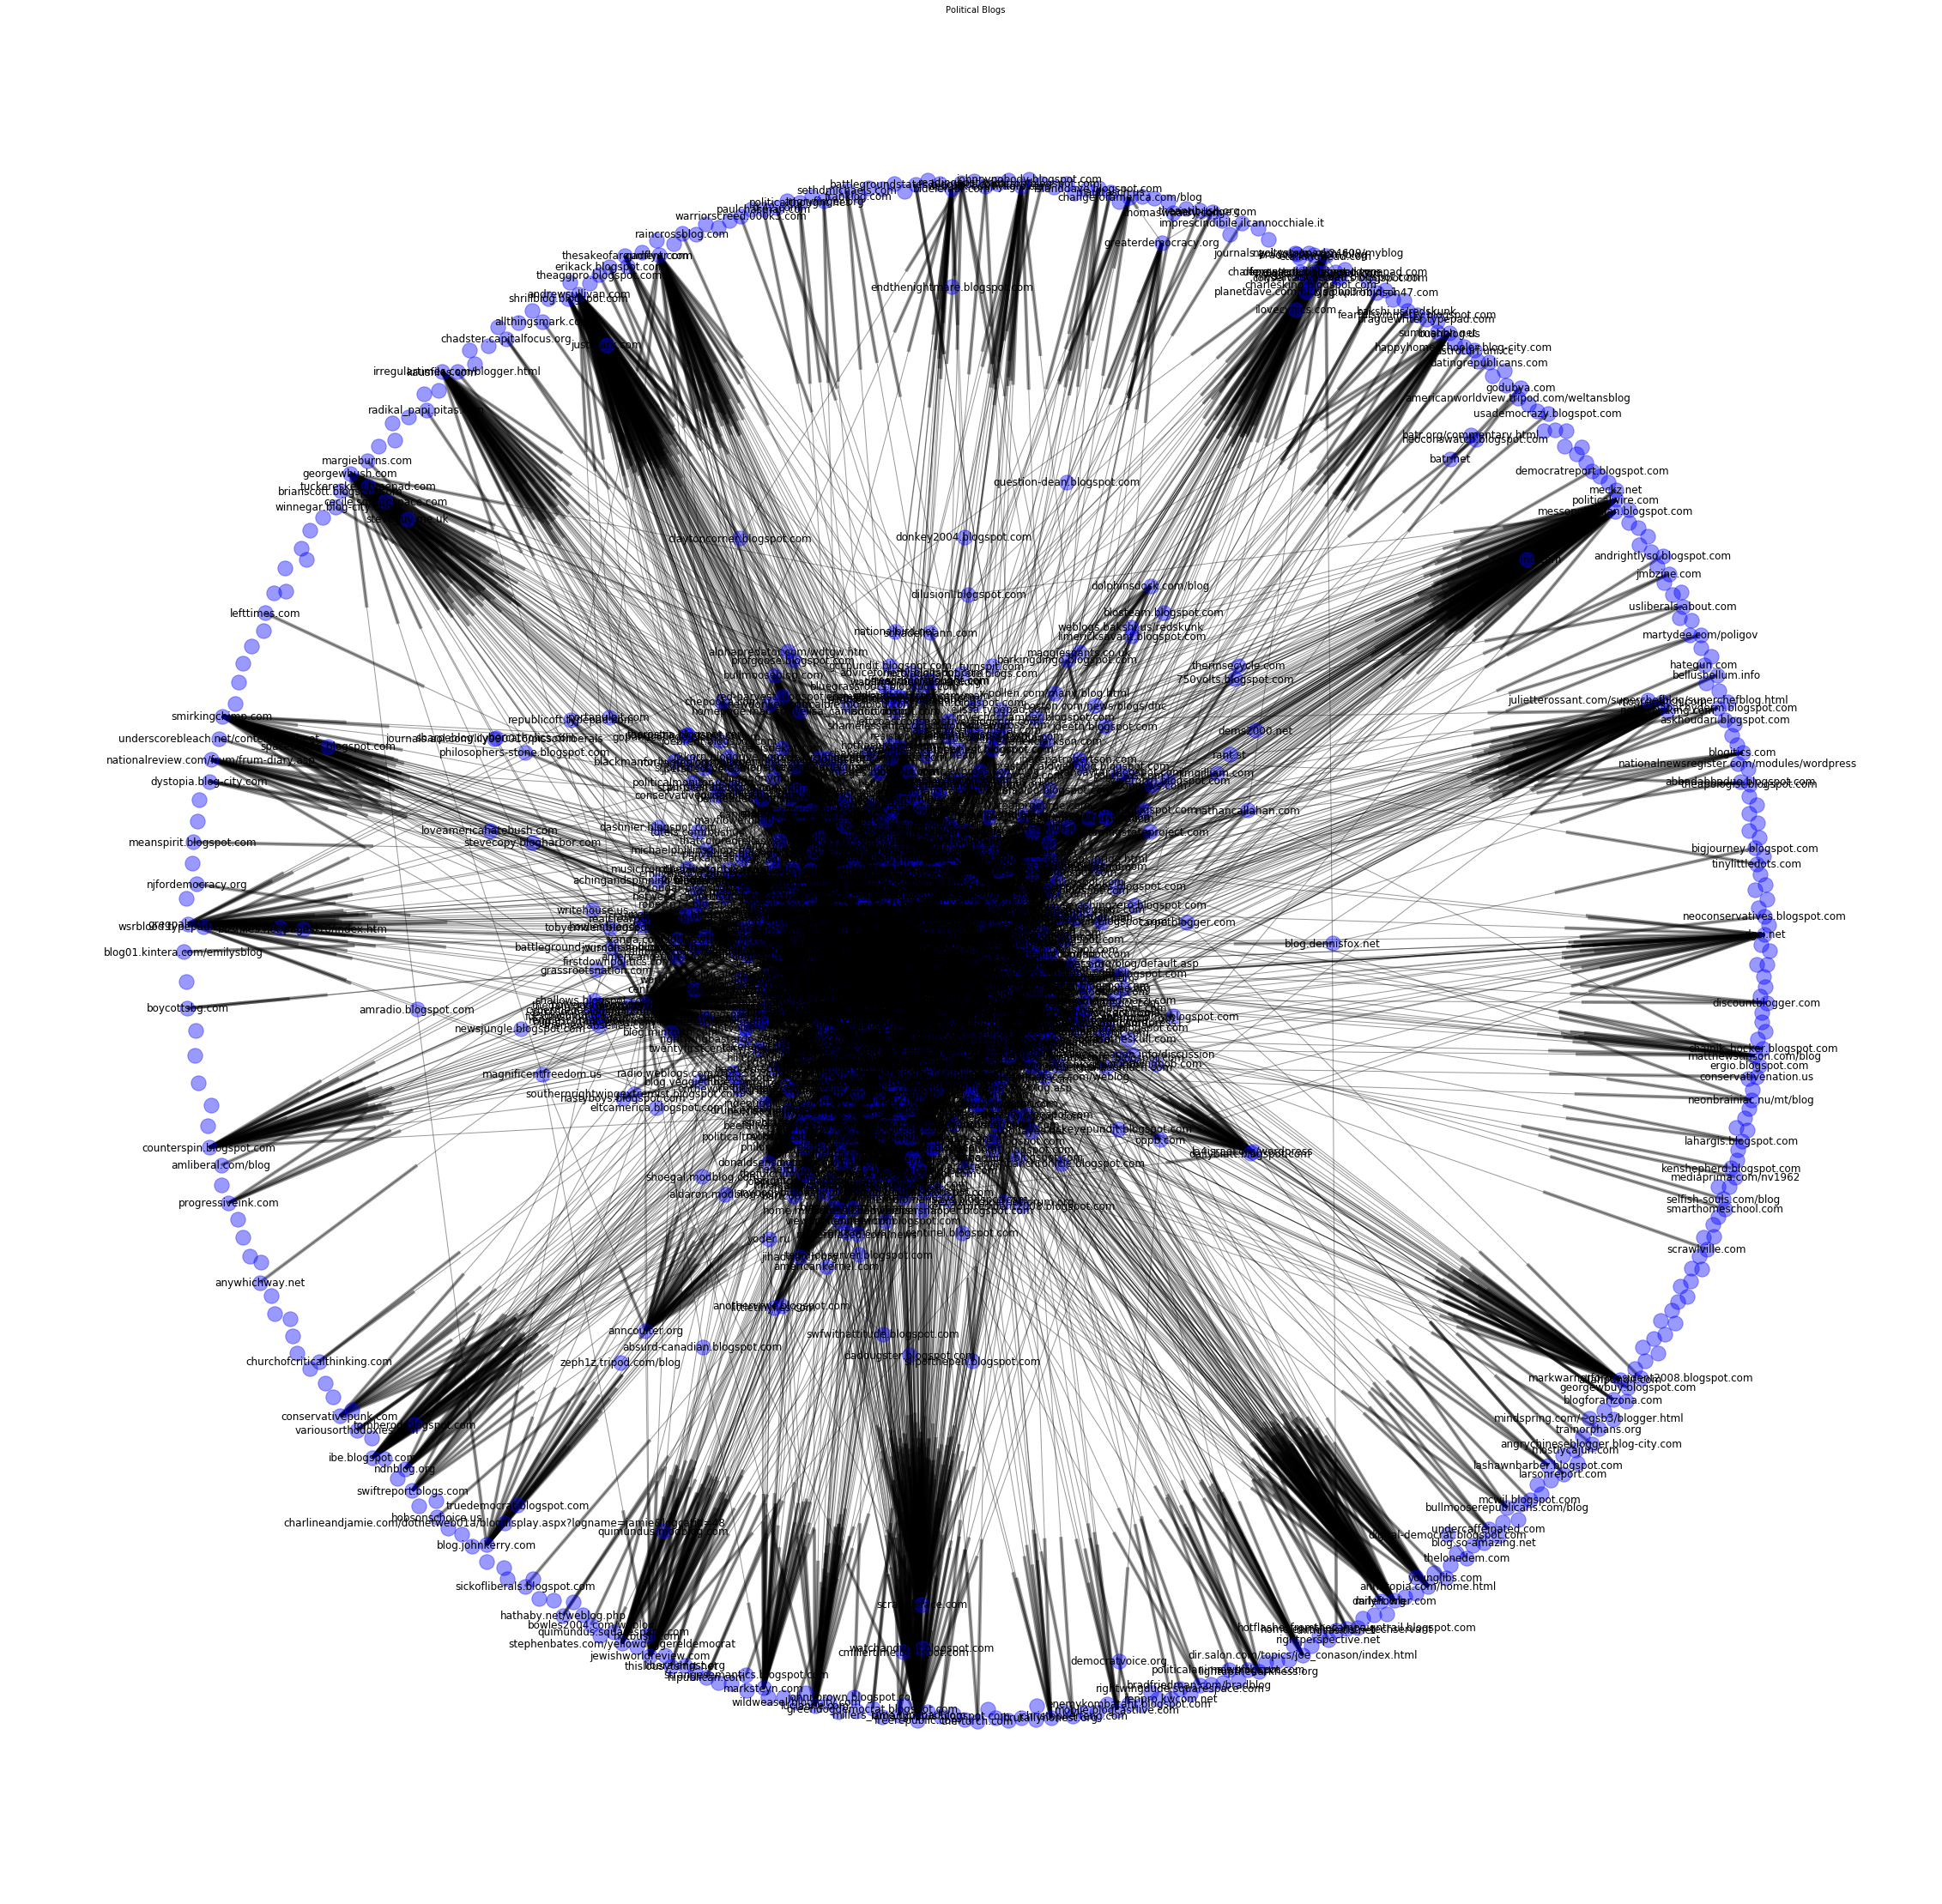

In [11]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(M ,iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {    'color'      : 'k',
            'fontsize'   : 10}
plt.title("Political Blogs", font)

nx.draw_networkx_nodes(M,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(M,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()


## Question 2. What are the 10 most influential blogs?

In [12]:
centrality=nx.eigenvector_centrality(G)

In [13]:
blogsList = []
for node in centrality:
    blogsList.append((node,centrality[node]))
    
sortedblogsList = blogsList.sort(key=lambda x: x[1])

In [15]:
sorted(blogsList, key=lambda x: x[1], reverse=True)[:10]
#return top 10

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

## Question 3. What are the 10 least influential blogs

In [16]:
sorted(blogsList, key=lambda x: x[1], reverse=False)[:10]
#return bottom 10

[('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('thingsasitis.net', 1.1736249650658601e-05)]

## Question 4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)

Left wing blog

In [17]:
centrality=nx.eigenvector_centrality(L)
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [20]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]
#return the top 10

[('atrios.blogspot.com', 0.20960069262288036),
 ('dailykos.com', 0.16836966726258346),
 ('bodyandsoul.typepad.com', 0.15679455118140717),
 ('liberaloasis.com', 0.15611669689292237),
 ('digbysblog.blogspot.com', 0.15543641689579613),
 ('tbogg.blogspot.com', 0.1501036544219527),
 ('corrente.blogspot.com', 0.1448593310175542),
 ('washingtonmonthly.com', 0.13968149417405412),
 ('dneiwert.blogspot.com', 0.13474938566339845),
 ('pandagon.net', 0.13295188387217458)]

In [21]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]
#return the bottom 10

[('democratvoice.org', 2.3485107549626796e-19),
 ('enemykombatant.blogspot.com', 2.3485107549626796e-19),
 ('digital-democrat.blogspot.com', 2.3485107549626796e-19),
 ('thelonedem.com', 2.3485107549626796e-19),
 ('vernsblog.thegillfamily.us:8180', 7.219003827223702e-06),
 ('massachusetts-liberal.com', 1.1209610884941803e-05),
 ('thingsasitis.net', 1.2208135676401792e-05),
 ('loveamericahatebush.com', 2.2521194207629758e-05),
 ('eltcamerica.blogspot.com', 2.585854229459883e-05),
 ('usademocrazy.blogspot.com', 3.5447296965166584e-05)]

Right wing blog

In [22]:
centrality=nx.eigenvector_centrality(R)
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [23]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]
#returns the top 10

[('instapundit.com', 0.2113912378221838),
 ('blogsforbush.com', 0.20315985849713197),
 ('hughhewitt.com', 0.17091799039890454),
 ('lashawnbarber.com', 0.1588744333304724),
 ('michellemalkin.com', 0.1474069323583246),
 ('powerlineblog.com', 0.14623996410167706),
 ('wizbangblog.com', 0.14567416434521388),
 ('littlegreenfootballs.com/weblog', 0.13915289252981466),
 ('vodkapundit.com', 0.13681297045170165),
 ('outsidethebeltway.com', 0.1225837452831519)]

In [24]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]
#eturns bottoom 10

[('markheimonen.blogspot.com', 5.073078363712567e-28),
 ('poeticvalues.blogspot.com', 5.073078363712567e-28),
 ('americanworldview.tripod.com/weltansblog', 5.687509322811977e-22),
 ('neoconswatch.blogspot.com', 1.090755983979966e-21),
 ('batr.org/commentary.html', 1.5164293652458691e-21),
 ('batr.net', 1.6179756529287948e-21),
 ('quimundus.modblog.com', 3.8876319746756753e-07),
 ('imprescindibile.ilcannocchiale.it', 1.6655958648503308e-05),
 ('quimundus.squarespace.com', 2.8347828965574303e-05),
 ('depressedlonelybored.typepad.com', 0.00014278027072298576)]